In [1]:
from gal4H0 import *
np.random.seed(0)
true_cosmology = FlatLambdaCDM(H0=70.,Om0=0.308)

## Incosistency 1: $z^4$

We study the bias on $H_0$ when GW events are distributed as $p_{\rm cat}(z)^2$ while in the analysis we just account for $p_{\rm cat}(z)$. 

In [3]:
LOSf=['MICECAT_LOS/micecat_451.csv','MICECAT_LOS/micecat_455.csv',
     'MICECAT_LOS/micecat_901.csv','MICECAT_LOS/micecat_905.csv']

sigmas=[0.1,0.2,0.3]
Ngw=1000000
zcut_rate=1.0
dl_thr=1550
H0_array=np.linspace(40,120,200)

posteriors={'H0_grid':H0_array}

for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=1)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,zcut_rate)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=draw_gw_events(10000,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)        
        pextra=zinterpo(gw_redshift)
        idxextra=np.random.choice(len(pextra),size=200,p=pextra/pextra.sum())
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=gw_obs_dl[idxextra],gw_true_dl[idxextra],gw_redshift[idxextra],std_dl[idxextra]
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors[ilos+'_'+str(sigma)+'_'+'combined']=combined


  1%|          | 21/2125 [00:00<00:10, 200.39it/s]

MICECAT_LOS/micecat_451.csv


100%|██████████| 2125/2125 [00:11<00:00, 185.78it/s]
116it [00:00, 1156.11it/s]

0.1
You detected 5811 binaries out of 100000 simulated


200it [00:00, 1194.17it/s]
Running on GW events: 200it [01:38,  2.03it/s]
123it [00:00, 1228.13it/s]

0.2
You detected 6633 binaries out of 100000 simulated


200it [00:00, 1186.04it/s]
Running on GW events: 200it [01:36,  2.07it/s]
121it [00:00, 1207.98it/s]

0.3
You detected 8932 binaries out of 100000 simulated


200it [00:00, 1193.88it/s]
Running on GW events: 200it [01:38,  2.02it/s]
  0%|          | 0/48028 [00:00<?, ?it/s]

MICECAT_LOS/micecat_455.csv


100%|██████████| 48028/48028 [04:37<00:00, 173.21it/s]
112it [00:00, 1118.20it/s]

0.1
You detected 5508 binaries out of 100000 simulated


200it [00:00, 1123.36it/s]
Running on GW events: 200it [01:49,  1.83it/s]
103it [00:00, 1024.78it/s]

0.2
You detected 6281 binaries out of 100000 simulated


200it [00:00, 1047.05it/s]
Running on GW events: 200it [01:52,  1.78it/s]
99it [00:00, 983.03it/s]

0.3
You detected 8458 binaries out of 100000 simulated


200it [00:00, 1014.27it/s]
Running on GW events: 200it [01:56,  1.71it/s]
  2%|▏         | 19/944 [00:00<00:05, 184.59it/s]

MICECAT_LOS/micecat_901.csv


100%|██████████| 944/944 [00:06<00:00, 147.83it/s]
90it [00:00, 899.19it/s]

0.1
You detected 5532 binaries out of 100000 simulated


200it [00:00, 955.12it/s]
Running on GW events: 200it [02:00,  1.67it/s]
123it [00:00, 1227.25it/s]

0.2
You detected 5648 binaries out of 100000 simulated


200it [00:00, 1247.15it/s]
Running on GW events: 200it [01:55,  1.72it/s]
101it [00:00, 1002.14it/s]

0.3
You detected 7535 binaries out of 100000 simulated


200it [00:00, 977.56it/s] 
Running on GW events: 200it [02:05,  1.59it/s]
  0%|          | 16/23661 [00:00<02:32, 154.90it/s]

MICECAT_LOS/micecat_905.csv


100%|██████████| 23661/23661 [02:44<00:00, 143.55it/s]
92it [00:00, 918.04it/s]

0.1
You detected 4411 binaries out of 100000 simulated


200it [00:00, 934.18it/s]
Running on GW events: 200it [02:09,  1.55it/s]
80it [00:00, 795.33it/s]

0.2
You detected 5127 binaries out of 100000 simulated


200it [00:00, 880.07it/s]
Running on GW events: 200it [02:09,  1.55it/s]
94it [00:00, 929.46it/s]

0.3
You detected 7310 binaries out of 100000 simulated


200it [00:00, 921.00it/s]
Running on GW events: 200it [02:09,  1.54it/s]


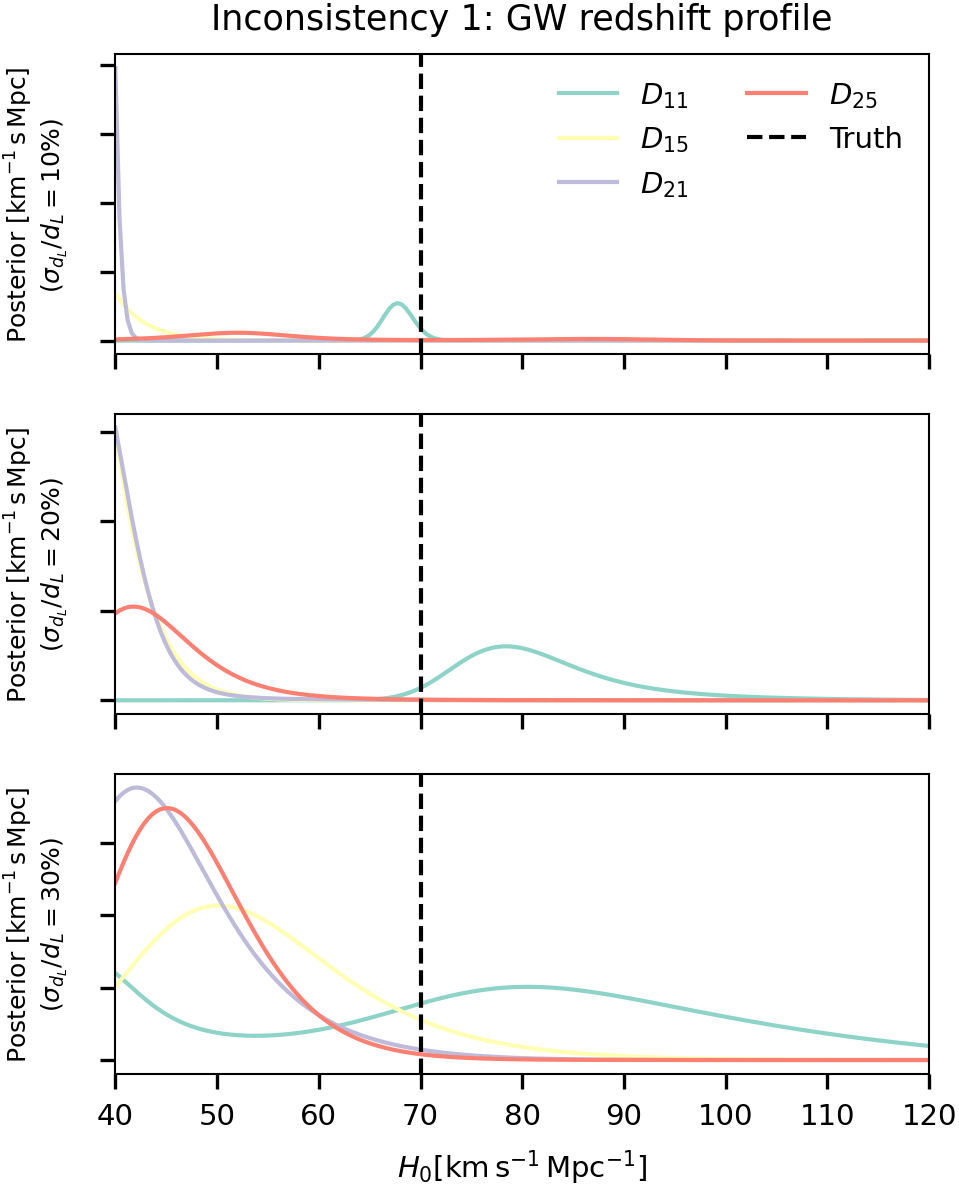

In [4]:
fig, ax= plt.subplots(3,1,figsize=(3.5,4.5),sharex=True)

pal=sns.color_palette('Set3')

colors=[pal[0],pal[1],pal[2],pal[3]]
lines=['solid','--',':']

labels_1=[r'$D_{11}$',
        r'$D_{15}$',
        r'$D_{21}$',
        r'$D_{25}$']

labels_2=[r'$\sigma_{d_L}/d_L=10\%$',
         r'$\sigma_{d_L}/d_L=20\%$',
         r'$\sigma_{d_L}/d_L=30\%$']


for i in range(len(colors)):
    for j in range(len(lines)):
        ilos=LOSf[i]
        sigma=sigmas[j]
        ax[j].plot(H0_array,posteriors[ilos+'_'+str(sigma)+'_'+'combined'],ls='solid',color=colors[i],label=labels_1[i])

for j in range(3):
    ax[j].axvline(70.,ls='--',color='k',label='Truth')
    ax[j].set_xlim([40,120])    
    ax[j].yaxis.set_ticklabels([])
    ax[j].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$'+'\n'+'('+labels_2[j]+')',fontsize=6)

ax[0].legend(frameon=False,ncol=2)
ax[0].set_title('Inconsistency 1: GW redshift profile')

ax[2].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
#plt.tight_layout()
plt.savefig('figures_paper/big_fig_doublecount.pdf')



# Inconsistency 2: GW detection probability

Below we generate the Hubble constant posterior mismatching the GW detection probability in the analysis. Everything is done correcntly but then the GW detection probability is assumed to be an Heaviside step function




In [3]:
LOSf=['MICECAT_LOS/micecat_451.csv','MICECAT_LOS/micecat_455.csv',
     'MICECAT_LOS/micecat_901.csv','MICECAT_LOS/micecat_905.csv']

sigmas=[0.1,0.2,0.3]
Ngw=1000000
zcut_rate=1.0
dl_thr=1550
H0_array=np.linspace(40,120,200)

posteriors={'H0_grid':H0_array}

for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=1)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,zcut_rate)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=draw_gw_events_TH21(10000,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)        
        pextra=zinterpo(gw_redshift)
        idxextra=np.random.choice(len(pextra),size=200,p=pextra/pextra.sum())
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=gw_obs_dl[idxextra],gw_true_dl[idxextra],gw_redshift[idxextra],std_dl[idxextra]
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors[ilos+'_'+str(sigma)+'_'+'combined']=combined


  1%|          | 11/2125 [00:00<00:19, 109.03it/s]

MICECAT_LOS/micecat_451.csv


100%|██████████| 2125/2125 [00:14<00:00, 151.11it/s]
92it [00:00, 919.23it/s]

0.1
You detected 5939 binaries out of 100000 simulated


200it [00:00, 986.40it/s] 
Running on GW events: 200it [02:16,  1.46it/s]
69it [00:00, 675.66it/s]

0.2
You detected 6134 binaries out of 100000 simulated


200it [00:00, 507.55it/s]
Running on GW events: 200it [02:42,  1.23it/s]
98it [00:00, 971.72it/s]

0.3
You detected 6103 binaries out of 100000 simulated


200it [00:00, 957.07it/s]
Running on GW events: 200it [02:07,  1.57it/s]
  0%|          | 0/48028 [00:00<?, ?it/s]

MICECAT_LOS/micecat_455.csv


100%|██████████| 48028/48028 [04:43<00:00, 169.43it/s]
125it [00:00, 1246.72it/s]

0.1
You detected 5277 binaries out of 100000 simulated


200it [00:00, 1248.81it/s]
Running on GW events: 200it [01:39,  2.01it/s]
124it [00:00, 1234.14it/s]

0.2
You detected 5241 binaries out of 100000 simulated


200it [00:00, 1244.52it/s]
Running on GW events: 200it [01:39,  2.01it/s]
123it [00:00, 1225.93it/s]

0.3
You detected 5322 binaries out of 100000 simulated


200it [00:00, 1219.59it/s]
Running on GW events: 200it [01:39,  2.02it/s]
  2%|▏         | 19/944 [00:00<00:05, 181.01it/s]

MICECAT_LOS/micecat_901.csv


100%|██████████| 944/944 [00:05<00:00, 183.19it/s]
124it [00:00, 1239.34it/s]

0.1
You detected 6290 binaries out of 100000 simulated


200it [00:00, 1245.35it/s]
Running on GW events: 200it [01:40,  1.98it/s]
123it [00:00, 1225.98it/s]

0.2
You detected 6444 binaries out of 100000 simulated


200it [00:00, 1231.91it/s]
Running on GW events: 200it [01:39,  2.00it/s]
113it [00:00, 1122.99it/s]

0.3
You detected 6373 binaries out of 100000 simulated


200it [00:00, 1137.22it/s]
Running on GW events: 200it [01:38,  2.02it/s]
  0%|          | 18/23661 [00:00<02:11, 179.47it/s]

MICECAT_LOS/micecat_905.csv


100%|██████████| 23661/23661 [02:09<00:00, 182.94it/s]
115it [00:00, 1146.68it/s]

0.1
You detected 4112 binaries out of 100000 simulated


200it [00:00, 1147.24it/s]
Running on GW events: 200it [01:42,  1.96it/s]
123it [00:00, 1226.57it/s]

0.2
You detected 4234 binaries out of 100000 simulated


200it [00:00, 1222.63it/s]
Running on GW events: 200it [01:40,  1.99it/s]
123it [00:00, 1228.78it/s]

0.3
You detected 4175 binaries out of 100000 simulated


200it [00:00, 1235.75it/s]
Running on GW events: 200it [01:42,  1.96it/s]


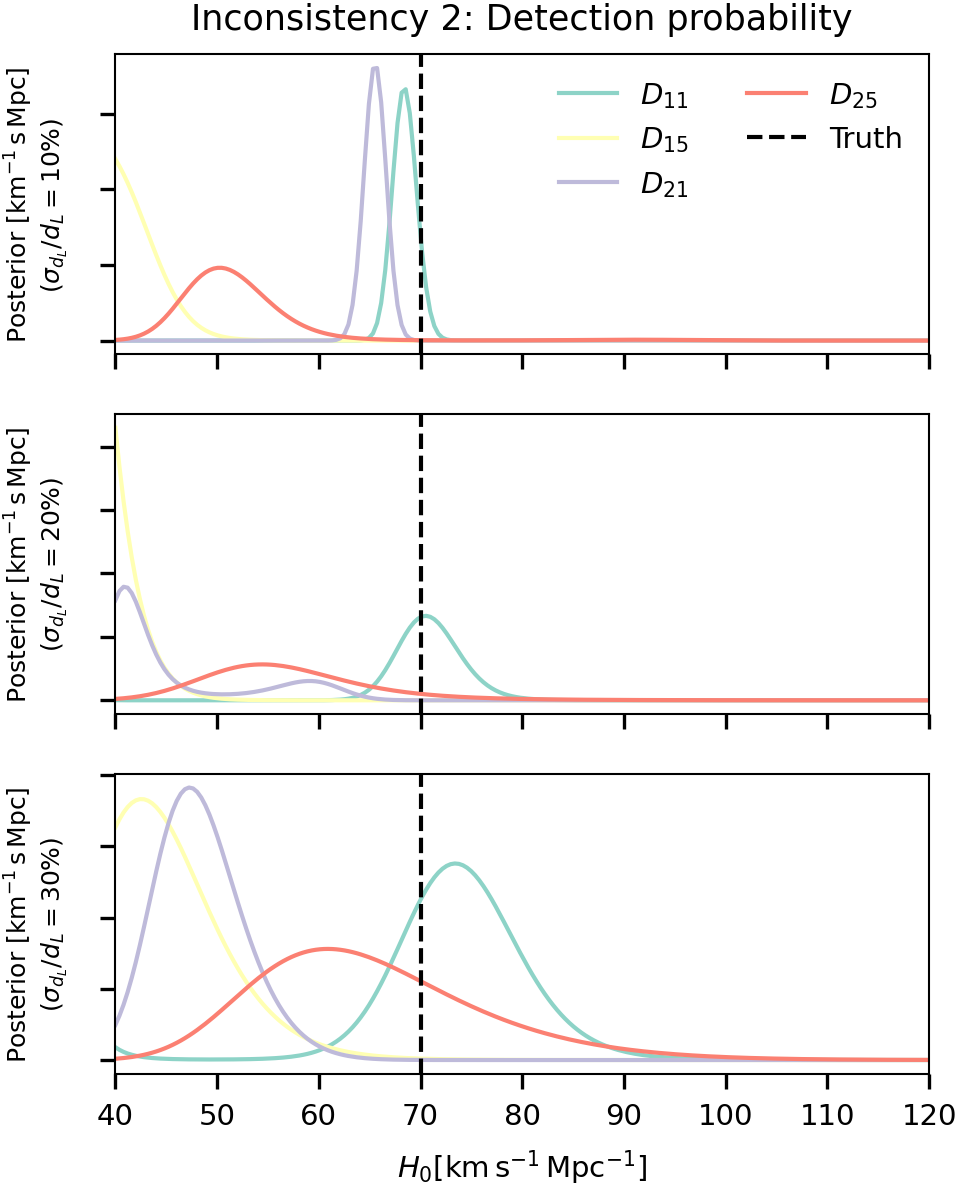

In [5]:
fig, ax= plt.subplots(3,1,figsize=(3.5,4.5),sharex=True)

pal=sns.color_palette('Set3')

colors=[pal[0],pal[1],pal[2],pal[3]]
lines=['solid','--',':']

labels_1=[r'$D_{11}$',
        r'$D_{15}$',
        r'$D_{21}$',
        r'$D_{25}$']

labels_2=[r'$\sigma_{d_L}/d_L=10\%$',
         r'$\sigma_{d_L}/d_L=20\%$',
         r'$\sigma_{d_L}/d_L=30\%$']


for i in range(len(colors)):
    for j in range(len(lines)):
        ilos=LOSf[i]
        sigma=sigmas[j]
        ax[j].plot(H0_array,posteriors[ilos+'_'+str(sigma)+'_'+'combined'],ls='solid',color=colors[i],label=labels_1[i])

for j in range(3):
    ax[j].axvline(70.,ls='--',color='k',label='Truth')
    ax[j].set_xlim([40,120])    
    ax[j].yaxis.set_ticklabels([])
    ax[j].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$'+'\n'+'('+labels_2[j]+')',fontsize=6)

ax[0].legend(frameon=False,ncol=2)
ax[0].set_title('Inconsistency 2: Detection probability')

ax[2].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
#plt.tight_layout()
plt.savefig('figures_paper/big_fig_heaviside.pdf')

